In [413]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [414]:
#importing data from the dataset
df = pd.read_csv(r"C:\Users\agarw\OneDrive\Desktop\Dissertation\data.csv")

In [416]:
# seperate the Bankrupt label from the dataset 
y = df['Bankrupt?']
X = df.drop(['Bankrupt?'], axis = 1)

In [417]:
# divinding our dataset into training dataset
X_train_smote, X_temp_smote, y_train_smote, y_temp_smote = train_test_split(X, y, test_size=0.3, random_state=42)

In [418]:
X_val_smote, X_test_smote, y_val_smote, y_test_smote = train_test_split(X_temp_smote, y_temp_smote, test_size=0.5, random_state=42)

In [419]:
smote = SMOTE(sampling_strategy=0.25, random_state=42)

In [420]:
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train_smote, y_train_smote)

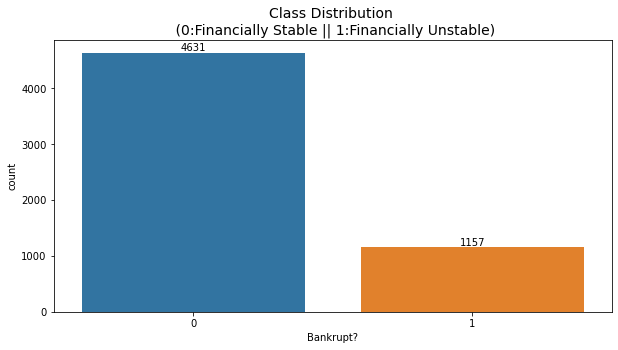

In [421]:
plt.figure(figsize = (10,5))
ax = sns.countplot(y_resampled_smote)
ax.bar_label(ax.containers[0])
plt.title('Class Distribution \n (0:Financially Stable || 1:Financially Unstable)', fontsize = 14)
plt.show()

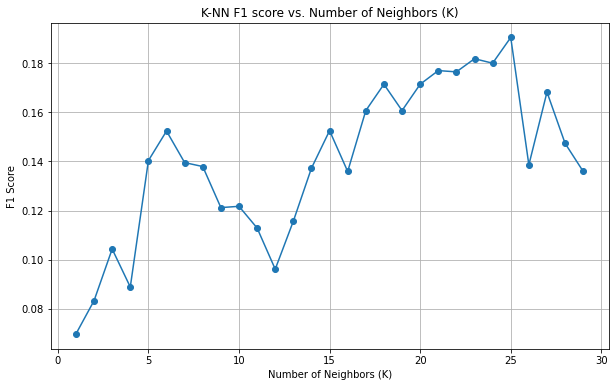

In [422]:
k_values = range(1, 30)

# Initialize lists to store accuracy scores for each K
f1_scores = []

# Iterate through different values of K
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_resampled_smote, y_resampled_smote)
    y_val_pred_smote = knn_classifier.predict(X_val_smote)
    f1_value = metrics.f1_score(y_val_smote, y_val_pred_smote)
    f1_scores.append(f1_value)

# Plot the results to find the "elbow"
plt.figure(figsize=(10, 6))
plt.plot(k_values, f1_scores, marker='o', linestyle='-')
plt.title("K-NN F1 score vs. Number of Neighbors (K)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("F1 Score")
plt.grid(True)
plt.show()

In [423]:
knn = KNeighborsClassifier(n_neighbors=25)

In [424]:
bagging_knn = BaggingClassifier(base_estimator=knn, n_estimators=40, random_state=42)

In [425]:
bagging_knn.fit(X_resampled_smote, y_resampled_smote)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=25),
                  n_estimators=40, random_state=42)

In [426]:
y_val_pred_smote = bagging_knn.predict(X_val_smote)

In [427]:
validation_accuracy = accuracy_score(y_val_smote, y_val_pred_smote)
print("Validation Accuracy:", validation_accuracy)

Validation Accuracy: 0.9139784946236559


In [428]:
conf_matrix_validation = confusion_matrix(y_val_smote, y_val_pred_smote)
print("Confusion matrix")
print(conf_matrix_validation)

Confusion matrix
[[926  58]
 [ 30   9]]


In [429]:
TN, FP, FN, TP = conf_matrix_validation.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Display other metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

Accuracy: 0.91
Precision: 0.13
Recall: 0.23
F1 Score: 0.17


In [430]:
y_test_pred_smote = bagging_knn.predict(X_test_smote)

In [431]:
test_accuracy = accuracy_score(y_test_smote, y_test_pred_smote)
print("Testing Accuracy:", test_accuracy)

Testing Accuracy: 0.9198435972629521


In [432]:
conf_matrix_testing = confusion_matrix(y_test_smote, y_test_pred_smote)
print("Confusion matrix")
print(conf_matrix_testing)

Confusion matrix
[[937  47]
 [ 35   4]]


In [433]:
TN, FP, FN, TP = conf_matrix_testing.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Display other metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

Accuracy: 0.92
Precision: 0.08
Recall: 0.10
F1 Score: 0.09
